# Computer Vision - Assignment 2 - Deep Learning for Computer Vision

#### 10 points   |   Due date: November 26, 23:59   |   Submission site: https://pradogrado2324.ugr.es/

### Student's Full Name: <mark>Javier Moreno Morón</mark>

The goal of this assignment is to learn how to implement and use Convolutional Neural Networks using the fastai library (https://docs.fast.ai/).

In [1]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.8 MB/s eta 0:00:00
Mounted at /content/gdrive
fastcore version 1.5.29 installed
fastai version 2.7.14 installed


In [2]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Exercise  3: Model transfer and fine-tuning with ResNet18 for the Caltech-UCSD Birds-200-2011 database (3.5 points)**
<font color='blue'>In this exercise we will work with the Caltech-UCSD Birds-200-2011 dataset (https://www.vision.caltech.edu/datasets/cub_200_2011/). This dataset consists of 11,788 images of 200 bird species. It has 200 classes, with 5,994 for training and 5,794 for testing. Again, 10% of the training set will be left for validation. Read the dataset using the provided functions.

<font color='blue'>We will use the ResNet18 network model already pre-trained with ImageNet, it can be downloaded from the fastai Model repository. You have to compare the performance of the following models and training strategies:

<font color='blue'>1. Use ResNet18 as a feature extractor for the Caltech-UCSD Birds-200-2011 dataset under three different scenarios:

>  <font color='blue'>1.1. Remove the final fully-connected (FC) layer of ResNet18, replace it by a FC layer of the dimensionality of the new problem, and train the new weights of this FC layer (while keeping frozen the remaining weights in the network).

> <font color='blue'>1.2. Instead of a single FC layer, employ the head introduced by default in fastai (see https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw and https://docs.fast.ai/vision.learner.html#head-and-model). Train these new weights (while keeping frozen the remaining weights in the network).

> <font color='blue'>1.3. Create your own head, combining all types of blocks you want (convolutional, FC layers,...). Train all these new weights (while keeping frozen the remaining weight in the network).

<font color='blue'>2. Make a fine-tuning of the entire ResNet18 network. Remember that the number of epochs for fine-tuning must be small.

<font color='blue'>3. Train from scratch the entire ResNet18 network. Remember that the number of epochs for fine-tuning must be VERY small.





---



---



---

First, we need to read the data from the URL

In [3]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

Para obtener el conjunto de datos a usar en el problema usamos untar_data.

untar_data descarga automáticamente los datos desde la URL proporcionada y los almacena en la ubicación especificada (o la ubicación predeterminada). Luego, descomprime los datos si es necesario y devuelve una ruta a la ubicación donde se han almacenado los datos.

In [4]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


Muestro el README para informarme un poco más acerca de la estructura del dataset.

In [5]:
!cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/README

The Caltech-UCSD Birds-200-2011 Dataset

For more information about the dataset, visit the project website:

  http://www.vision.caltech.edu/visipedia

If you use the dataset in a publication, please cite the dataset in
the style described on the dataset website (see url above).

Directory Information
---------------------

- images/
    The images organized in subdirectories based on species. See 
    IMAGES AND CLASS LABELS section below for more info.
- parts/
    15 part locations per image. See PART LOCATIONS section below 
    for more info.
- attributes/
    322 binary attribute labels from MTurk workers. See ATTRIBUTE LABELS 
    section below for more info.



IMAGES AND CLASS LABELS:
Images are contained in the directory images/, with 200 subdirectories (one for each bird species)

------- List of image files (images.txt) ------
The list of image file names is contained in the file images.txt, with each line corresponding to one image:

<image_id> <image_name>
---------------

In [6]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

Aquí se han guardado las subrutas de las imágenes y sus respectivos IDs en un vector, los IDs nos sirven porque luego en otro fichero cada ID tiene asociado si pertenece a train o a test.

In [7]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 59 60 60 60 60 57 60 59 60 48 59 60 59 60 60 59 59 59 60 60 60 51 60 60 60 60 60 58 60 60 60 60 60 60 60 60 60 59 59 60 60 50 60 60 59 59 60 60 59 60 60 60 60 60 60 59 60 60 60 52 41 60 56 60 56 60 59 60 60 60 58 60 60 60 60 60 60 60 60 60 60 56 60 60 57 60 59 60 60 59 60 59 60 60 59 59 60 60 59 60 60 60 60 60 60 60 44 59 60 60 59 60 60 60 60 59 59 60 60 60 60 60 60 60 60 60 60 59 60 50 60 60 58 53 60 60 60 58 60 60 53 50 60 60 60 60 60 60 60 60 60 60 60 60 58 60 60 50 58 45 60 60 60 60 60 60 60 60 60 49 59 60 60 60 59 59 59 60 60 60 60 60 60 60 60 60 60 59 60 60 53 60 60 59 60 60 60 60 

Ahora se muestran el número de muestras por clase, vemos que existe un pequeño desvalanceo, pero en general la mayoría tienen 60 muestras.

In [8]:
# Now we have in images_list the list with all the images, and in train_test_split which ones belong to training (1) or test (0)
# We are going to create two folders: one train and another test, and we are going to put the corresponding images inside
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

A continuación se crea una carpeta para train y otra para test y se guardan las imágenes donde corresponda.

In [9]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/044.Frigatebird'), Path('/root/.fastai/data/CUB_200_2011/train/140.Summer_Tanager'), Path('/root/.fastai/data/CUB_200_2011/train/020.Yellow_breasted_Chat'), Path('/root/.fastai/data/CUB_200_2011/train/109.American_Redstart'), Path('/root/.fastai/data/CUB_200_2011/train/184.Louisiana_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/185.Bohemian_Waxwing'), Path('/root/.fastai/data/CUB_200_2011/train/014.Indigo_Bunting'), Path('/root/.fastai/data/CUB_200_2011/train/075.Green_Jay'), Path('/root/.fastai/data/CUB_200_2011/train/061.Heermann_Gull'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/121.Grasshopper_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/008.Rhinoceros_Auklet'), Path('/root/.fastai/data/CUB_200_2011/train/126.Nelson_Sharp_tailed_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/193.Bewick_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/15

Observamos que se han creado las carpetas para las 200 clases correctamente.

In [10]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [11]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


Y ya con las imágenes separadas observamos que ambos conjuntos tienen el tamaño correcto antes indicado.

In [12]:
# Ajustamos semillas para poder reproducir los experimentos
from fastai.basics import set_seed

seed = 42  # Puedes usar cualquier número entero como semilla

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)


Vamos a empezar creando el objeto DataBlock con los datos recien obtenidos.

DataBlock se utiliza para definir las transformaciones de datos y cómo se deben dividir en conjuntos de entrenamiento y validación. Alguno de los parámetros que podemos modificar para especificar las tareas que debe realizar DataBlock son:
* blocks: Este parámetro es una lista de objetos que representan los tipos de datos que se encuentran en tus datos. Por ejemplo, si estás trabajando con imágenes y etiquetas de texto, blocks podría ser [ImageBlock, TextBlock]. Esto especifica qué bloques de transformación se aplicarán a cada tipo de dato. En nuestro caso como las entradas son imágenes usaremos ImageBlock y como la salida son categorías usaremos CategoryBlock.

* get_items: Esta función se utiliza para obtener una lista de elementos de tus datos. Por ejemplo, si estás trabajando con imágenes, get_items podría ser una función que devuelve una lista de rutas de archivo a las imágenes. En nuestro caso usaremos la función proporcionada por fastai get_image_files(path, recurse, folders), la cual obtiene las imagenes de la ruta (path) especificada recursivamente si se activa y solo de los folders especificados.

* splitter: Esta función se utiliza para dividir los datos en conjuntos de entrenamiento y validación. Puede ser una función o un valor entero que determina la división de datos. Una opción puede ser usar la función de fastai GrandparentSplitter(train_name, valid_name), que divide en train y validación según el nombre del directorio abuelo de las imágenes, el cual debe coincidir con el valor especificado. Como este no es nuestro caso usaremos otra función, esta es RandomSplitter(valid_pct, seed), que separa el porcentaje especificado para validación de forma aleatoria.

* get_x y get_y: Estas funciones se utilizan para obtener los datos de entrada (x) y las etiquetas (y) de tus datos. En nuestro caso ya hemos especificado como obtener las imágenes, así que solo usaremos get_y, por la estructura de los datos las etiquetas son el nombre del directorio padre donde se encuentran las imágenes, por lo que usamos la función de fastai parent_label().

* item_tfms: Aquí puedes especificar las transformaciones que se aplicarán a cada elemento de datos individual. Esto puede incluir redimensionar imágenes, normalizar valores numéricos, tokenizar texto, entre otros. En nuestro caso no lo usaremos, ya que al usar un modelo preentrenado, fastai se encarga automáticamente de aplicar las transformaciones o normalizado que proceda.

* batch_tfms: Estas transformaciones se aplican a los lotes de datos, es decir, a un conjunto de elementos de datos a la vez. Puedes usar esto para realizar transformaciones como la normalización. En modelos ya preentrenados, no es necesario normalizar, ya que es el propio modelo el que lo hace ya automáticamente.

Actualización: Al ejecutar el resumen del datablock para train obtengo un error diciendo que no todas las imágenes tienen las mismas dimensiones, por lo que si que redimensiono, por lo que dice el error la dimensión es ?x500, como parece que en un eje si que se respeta la dimensión, 500, redimensionaré a tamaño 500x500.

Para ello en item_tfms, es decir aplicado a cada item individualmente, uso la función Resize(), a la cual le paso una dimensión, 500, indicándole que quiero que transforme las imágenes a 500x500 y un método, method, que sirve para indicar como quiero redimensionar la imagen, hay varias alternativas, yo usaré 'crop' que es la opción por defecto, este es un método donde la imagen se redimensionará recortando o estirando según sea necesario para que se ajuste a las dimensiones especificadas.

In [13]:
dbk = DataBlock(
                blocks = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.1, seed=0), # 10% validación como dice el guión
                get_y = parent_label,
                item_tfms=[Resize(500)]
)

dbk.summary(path/'train')

Setting-up type transforms pipelines
Found 5994 items
2 datasets of sizes 5395,599
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/CUB_200_2011/train/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0070_115645.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/CUB_200_2011/train/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0070_115645.jpg
    applying parent_label gives
      121.Grasshopper_Sparrow
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(120)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(120))


Found 5994 items
2 datasets of sizes 5395,599
Setting up Pipeline: PILBase.create
Setting up

Creamos el dataset de entrenamiento con dataloaders(), esta función toma como argumento un DataBlock y una ubicación o fuente de datos (por ejemplo, un directorio con imágenes) y crea los objetos DataLoaders configurados de acuerdo con la definición del DataBlock. Esto incluye cargar y transformar los datos según las especificaciones proporcionadas en el DataBlock.

Especificamos batchs de 32 elementos como ya hemos venido haciendo en los anteriores ejercicios, ya que los resultados han sido buenos y así introducimos más variabilidad estocástica en cada actualización de pesos, lo que puede actuar como una forma de regularización estocástica, ayudando a prevenir el sobreajuste.

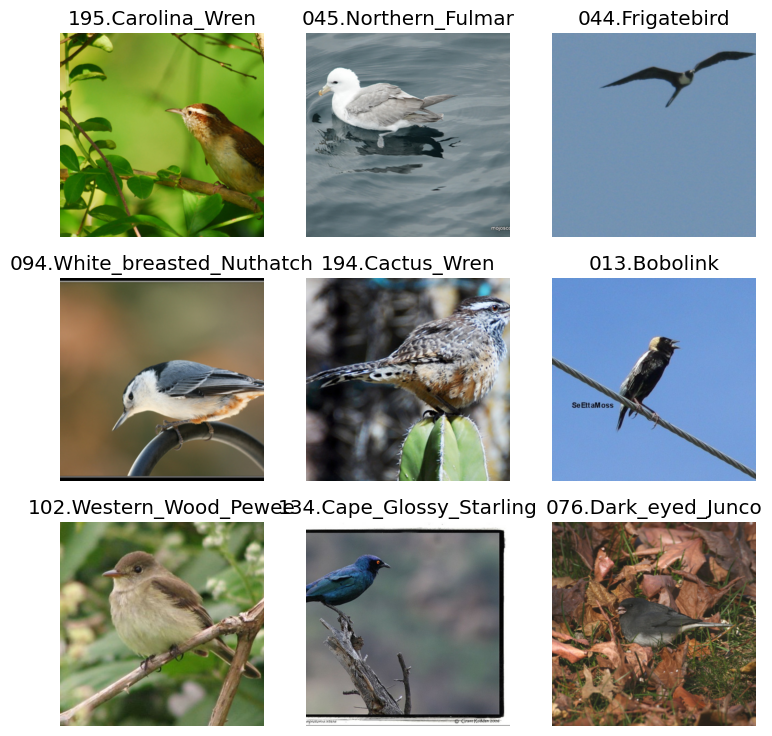

In [14]:
dls = dbk.dataloaders(path/'train', bs=32)

dls.show_batch() # Muestra un conjunto de imágenes

Ya con los datasets declarados pasamos a crear y probar los distintos modelos propuestos.

## <font color='blue'> 3.1.1 Train single FC layer included in the head

In [15]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)

Lo primero que hacemos es obtener la red Resnet18 mediante la llamada fastai.vision.models.resnet18 y luego creamos el learner pasandole dicha red. El resto de argumentos los dejo igual que en los anteriores ejercicios por los mismos motivos.

No obstante para crear el modelo ya no usamos el constructor de Learner, sino que usamos la función vision_learner(), para poder pasarle una red ya preentrenada y poder por ejemplo modificar la cabeza como queremos hacer en estos ejercicios. Podemos observar como esta función comparte algunos parámetros con Learner(), aunque también tiene varios parámetros extra, estos son:
* normalize: Un valor booleano para añadir una normalización al dataloader(si no tiene ya una), usando las estadísticas del modelo preentrenado, como no hemos añadido en el dls pensando justo en esto lo dejamos a True.

* n_out: Para indicar el número de parámetros de salida final de la red, por defecto es None, por lo que consulta el dataloader para fijar el valor, lo dejamos en None por tanto.

* pretrained: Para indicar si queremos guardar los valores de los pesos del modelo preentrenado o resetearlos, en este caso como solo vamos a entrenar la cabeza que añadamos lo dejamos en True.

* custom_head: Especifica la red neuronal que queremos añadir como cabeza de la red existente añadida, en este ejercicio queremos que se añada una capa Linear que pasa del número de características que tuviera la salida de la red existente, al número de características deseado en nuestro problema, para ello primero creamos esta cabeza y luego la pasamos a este parámetro.

* wd: Controla la tasa de regularización L2, lo fijaré a 0.01 para tener algo de protección frente al sobreajuste, elijo este valor ya que probando en el ejercicio 2 no varía mucho los resultados seleccionando una magnitud mayor o menor a esta.

Por último mostramos un resumen del modelo para poder ver en detalle la estructura de la red.

In [ ]:
# Crear el modelo ResNet18 preentrenado
resnet18 = fastai.vision.models.resnet18

# Crear la custom_head
basic_head = nn.Sequential(
    nn.Flatten(),
    nn.Linear(131072, 200)
)

# Declaramos el objeto Learner
learn = vision_learner(dls, resnet18, CrossEntropyLossFlat(), opt_func=Adam, metrics=accuracy, custom_head=basic_head, wd=0.01)

# Imprimir el resumen de la arquitectura
learn.summary()

Sequential (Input shape: 32 x 3 x 500 x 500)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 250 x 250 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 125 x 125 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Vemos que la red es una enorme sucesión de capa de convolución + función de activación + normalización, con un Pooling al principio para reducir la dimensionalidad inicial muy posiblemente.

Recordar que la última capa FC no es propia de ResNet18, sino que es la que añadimos para poder especificar la salida ajustada al problema, en nuestro caso 200 variables.

Y por último entrenamos la cabeza añadida, para ello usamos la función fine_tune(), esta función similar a fit_one_cycle(), ya usada en los anteriores ejercicios, tiene el añadido de que podemos indicarle cuantas épocas queremos entrenar solo la cabeza del modelo, con el parámetro freeze_epochs, el resto es igual que fit_one_cycle().

Selecciono 3 épocas ya que al final lo que quiero es comparar las distintas elecciones de cabeza para el modelo, por lo que con 3 épocas de entrenamiento de pesos para todos los casos ya obtendré resultados válidos para comparar y consigo reducir el tiempo de entrenamiento.

Las épocas normales las marco a 0 ya que ya tenemos los pesos preentrenados del modelo y ahora mismo solo estamos entrenando la cabeza de la red.

Por último tampoco indico lr de nuevo porque solo estamos probando cabezas, a la hora de entrenar toda la red ya haré una búsquedad del óptimo como en los ejercicios anteriores.

In [ ]:
learn.fine_tune(0, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,29.987026,45.027489,0.101836,01:21
1,97.302872,141.045471,0.128548,01:17
2,100.495796,171.214706,0.217028,01:19


Por último los resultados simplemente podemos ver esta tabla, ya que las gráficas se obtienen con los resultados de las épocas de toda la red, no solo de la cabeza.

No obstante podemos hacer un análisis, vemos que los resultados son malísimos, esto se debe a lo básica que era la cabeza añadida sumado a que no entrenamos nada el modelo preentrenado, por lo que al final no ajustamos el modelo a nuestro problema, sino que usamos el aprendizaje obtenido en su conjunto de datos anterior.

## <font color='blue'> 3.1.2 Train head included by default in fastai

In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)

Ahora queremos usar la cabeza predeterminada de fastai, para ello la creamos con la función create_head(), a la que le pasamos el número de características de entrada y de salida, el de salida como ya sabemos es 200, en cuanto al de entrada observando el resumen del apartado anterior de la red Resnet18, vemos que sus características de salida son 512, por lo que estas serán las de entrada para nuestra cabeza.

Por último volvemos a imprimir un resumen para ver de que consta esta cabeza predeterminada.

In [ ]:
# Crear el modelo ResNet18 preentrenado
resnet18 = fastai.vision.models.resnet18

# Creamos la cabeza predeterminada de fastai
custom_head = create_head(512, 200)

# Declaramos el objeto Learner
learn = vision_learner(dls, resnet18, CrossEntropyLossFlat(), opt_func=Adam, metrics=accuracy, custom_head=custom_head, wd=0.01)

# Imprimir el resumen de la arquitectura
learn.summary()

Sequential (Input shape: 32 x 3 x 500 x 500)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 250 x 250 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 125 x 125 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Podemos observar que la cabeza predeterminada de fastai, a partir de los AdaptativePool's, es muy similar a la cabeza de ResNet18.

In [ ]:
learn.fine_tune(0, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,6.441913,4.825606,0.056761,01:30
1,4.276021,3.002357,0.320534,01:28
2,2.753497,1.974938,0.512521,01:33


Comparando los resultados vemos que tanto la accuracy como el error de validación son algo mejores que en el caso de no usar cabeza, en cuanto al error de train este es casi el mismo, por lo que también tenemos algo más de margen de mejora en este caso.

## <font color='blue'> 3.1.3. Train new custom head (including convolutional layers, FC layers, etc.)

In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)

Por último nos encargamos de crear una cabeza personalizada nosotros mismos, debemos tener en cuenta que la entrada sea para 512 características y la salida para 200.

Teniendo eso en cuenta la estructura elegida es la siguiente:
* Capa Conv2d: Mi idea es seguir extrayendo algunas características de más alto nivel antes de hacer el flattening, aumento los canales de salida para intentar guardar toda la información posible y perder lo mínimo y uso un tamaño de kernel de 7 para extraer esas características de alto nivel que mencionaba.

* Capa de normalizado: Capa de normalización tras obtener las nuevas variables para mantener una media y desviación típica estables y así tener un mejor entrenamiento.

* Capa LeakyReLU: Tras la extracción de características buscamos relaciones no lineales en las mismas, en este caso pruebo con esta versión de ReLU, Leaky ReLU es una variante de ReLU que permite un pequeño gradiente cuando x < 0. Esto ayuda a abordar el problema de neuronas muertas que pueden ocurrir en la función ReLU cuando los valores de entrada son negativos. Su ventaja respecto a ReLU es que puede ayudar a mantener la información en la red y evitar que algunas neuronas mueran. Aunque la verdad es que la uso simplemente por variar y probar distintas funciones de activación y familiarizarme con ellas.

* Capa de Pooling: Para reducir la dimensionalidad antes del flattening, si no aplico una capa de normalizado antes es porque por lo que he visto en la red Resnet18, no es tan importante estar constantemente normalizando.

* Capa Flatten: Pasamos la matriz 2D a un vector para poder aplicarle una capa FC.

* Capa Dropout: Agregamos una capa de Dropout para que esta desactive neuronas en el entrenamiento y así el modelo no sobreentrene, ajustamos la probabilidad de desactivar una neurona al 25%, un poco copiando la cabeza predeterminada de fastai.

* Capa Linear: Aplicamos una capa lineal, que realiza una transformación lineal de la entrada y reducimos el número de variables.

* Capas LeakyReLU y normalizado: De nuevo aplicamos una función de activación y normalizamos los datos, los cuales seguro que están ya mal distribuidos y necesitan estabilizar su media y desviación de nuevo.

* Capa Dropout: Agregamos otra capa Dropout entre ambas FC, de nuevo para desactivar neuronas, en este caso usaremos un p=0.5

* Capa linear: Aplicamos una última capa lineal para quedarnos con 200 variables, el número de clases que tenemos.

In [ ]:
# Crear el modelo ResNet18 preentrenado
resnet18 = fastai.vision.models.resnet18

# Creamos la cabeza customizada
custom_head = nn.Sequential(
                nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=7), # 16x16 --> 10x10
                nn.BatchNorm2d(num_features=1024),
                nn.LeakyReLU(),
                nn.MaxPool2d(kernel_size=2), #10x10 --> 5x5

                Flatten(), # 25*1024

                nn.Dropout(0.25),
                nn.Linear(1024*25, 2048),  # 1024*25 --> 2048
                nn.LeakyReLU(),
                nn.BatchNorm1d(2048),
                nn.Dropout(0.5),
                nn.Linear(2048, 200)  # 2048 --> 200
              )

# Declaramos el objeto Learner
learn = vision_learner(dls, resnet18, CrossEntropyLossFlat(), opt_func=Adam, metrics=accuracy, custom_head=custom_head, wd=0.01)

# Imprimir el resumen de la arquitectura
learn.summary()

Sequential (Input shape: 32 x 3 x 500 x 500)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 250 x 250 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 125 x 125 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
learn.fine_tune(0, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,4.593181,3.895072,0.225376,01:38
1,3.824646,3.573102,0.343907,01:36
2,3.576910,3.860158,0.377295,01:38


Los resultados son simplemente desastrosos, ambas losses son mucho peores que usando las otras cabezas y aparte train loss ya es menor que la de validación, por lo que el modelo ya no tiene mucho margen de mejora y está empezando a sobreajustar.

Por esto voy a modificar la cabeza eliminando la convolución, ya que tal vez usando un kernel tan grande estuviera destruyendo información importante, y directamente haré el flattening seguido de las dos capas FC para ver si de esta forma consigo mejorar los resultados.

In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)

In [ ]:
# Crear el modelo ResNet18 preentrenado
resnet18 = fastai.vision.models.resnet18

# Creamos la cabeza customizada
custom_head = nn.Sequential(
                nn.MaxPool2d(kernel_size=2), #16x16 --> 8x8

                Flatten(), # 64*512

                nn.Dropout(0.25),
                nn.Linear(64*512, 2048),  # 64*512 --> 2048
                nn.BatchNorm1d(2048),
                nn.ReLU(),
                nn.BatchNorm1d(2048),
                nn.Dropout(0.5),
                nn.Linear(2048, 200, bias=False)  # 2048 --> 200
              )

# Declaramos el objeto Learner
learn = vision_learner(dls, resnet18, CrossEntropyLossFlat(), opt_func=Adam, metrics=accuracy, custom_head=custom_head, wd=0.01)

# Imprimir el resumen de la arquitectura
learn.summary()

Sequential (Input shape: 32 x 3 x 500 x 500)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 250 x 250 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 125 x 125 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
learn.fine_tune(0, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,4.917545,3.500908,0.280467,01:31
1,3.039887,3.438908,0.318865,01:23
2,2.304616,3.461587,0.345576,01:28


Los resultados siguen siendo igual de malos, por lo que usaré la cabeza predeterminada de fastai para los siguientes apartados, ya que es la que mejores resultados me ha dado.

## <font color='blue'> 3.2. Fine-tuning of all ResNet18 (including the suitable FC layer as output/head)

In [16]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)

Creamos el learner al igual que antes usando la cabeza predeterminada de fastai, ya que es la que mejores resultados nos ha dado.

Añadimos parámetros ya usados en el ejercicio 2, como el early stopping para protegernos del sobreajuste o regularización L2, también para paliar el overfitting.

In [17]:
# Crear el modelo ResNet18 preentrenado
resnet18 = fastai.vision.models.resnet18

# Creamos la cabeza predeterminada de fastai
custom_head = create_head(512, 200)

# Declaramos el objeto Learner
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)

learn1 = vision_learner(dls, resnet18, CrossEntropyLossFlat(), opt_func=Adam, metrics=accuracy, custom_head=custom_head, cbs=early_stopping_cb, wd=0.01)

# Imprimir el resumen de la arquitectura
learn1.summary()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 40.0MB/s]


Sequential (Input shape: 32 x 3 x 500 x 500)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 250 x 250 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 125 x 125 
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Volvemos a usar lr_find() para encontrar el learning rate óptimo para el modelo.

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(valley=0.002511886414140463)


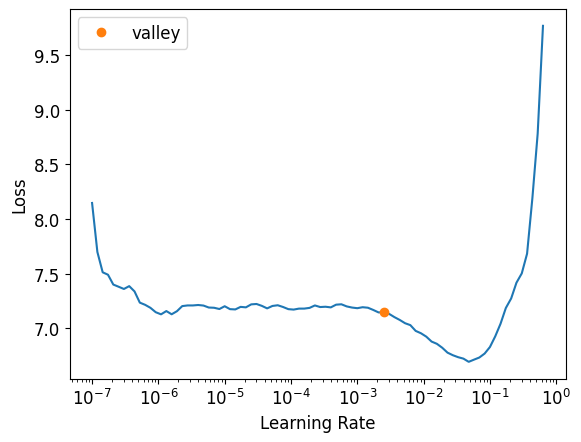

In [18]:
# Realizar una búsqueda de tasa de aprendizaje
lr = learn1.lr_find()

print(lr)

In [19]:
learn1.fine_tune(6, freeze_epochs=0, base_lr=lr[0])

epoch,train_loss,valid_loss,accuracy,time
0,5.414308,3.518589,0.217028,01:32
1,2.855251,1.872345,0.510851,01:34
2,1.625071,1.313955,0.641068,01:34
3,0.925022,1.066718,0.706177,01:34
4,0.530575,1.007445,0.739566,01:35
5,0.366248,0.980852,0.729549,01:33


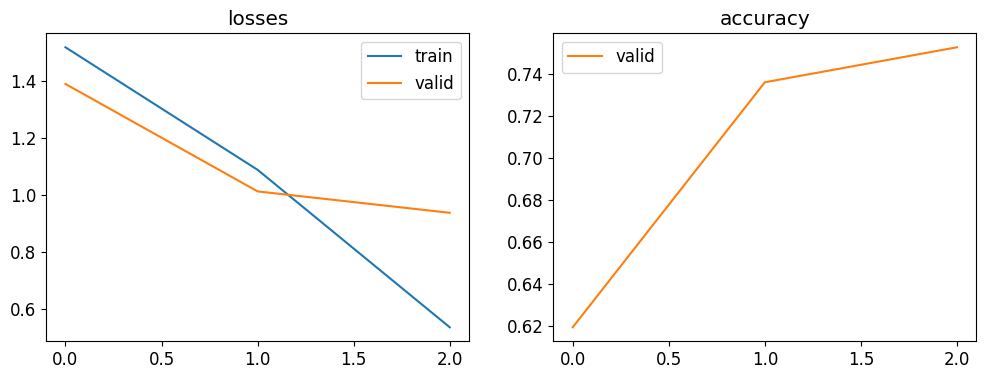

In [ ]:
learn1.recorder.plot_metrics() # muestra la gráfica de la accuracy

Obtenemos muy buenos resultados, normal al usar una buena red existente ya preentrenada, también vemos que con 3 épocas de entrenamiento es suficiente, pues ya empezaba a haber sobreajuste, se puede observar muy bien en la gráfica de la pérdida como se cruzan ambas líneas, ralentizándose la mejora en validación e incrementándose la de entrenamiento.

Por otro lado vemos que la accuracy todavía no llega a estabilizarse, sigue en ascenso, aunque por lo visto con los valores de loss creo que ya no mejorará mucho más.

In [ ]:
preds, targs, _ = learn1.get_preds(dl=dls.train, with_decoded=True)

# Calculamos la accuracy en train
acc = accuracy(preds, targs)
print('Accuracy en train : ', round(float(acc)*100, 4), '%')

Accuracy en train :  98.165 %


In [ ]:
preds, targs, _ = learn1.get_preds(dl=dls.valid, with_decoded=True)

# Calculamos la accuracy en validación
acc = accuracy(preds, targs)
print('Accuracy en validación : ', round(float(acc)*100, 4), '%')

Accuracy en validación :  75.2922 %


Viendo el valor de la accuracy en train retiro lo dicho antes, ya existe bastante sobreajuste, casi que con 2 épocas era suficiente, no obstante como al final mejoramos en 4 puntos la accuracy en validación a la par que también se reduce el error confio en que esas mejoras también se reflejarán en test y en que el modelo obtenido es capaz de generalizar medianamente bien, pero obteniendo muy buenos resultados como es un 75% de acierto.

En vez de mostrar la matriz de confusión, al tener 200 clases no se iba a poder sacar ninguna conclusión, muestro los valores de precision, recall y f1-score para cada clase, esto lo hago usando la función print_classification_report(), la cual muestra:
* Recall: Mide la proporción de positivos reales que fueron correctamente identificados por el modelo.

* Precision: Mide la proporción de positivos predichos que fueron correctos.

* F1-score: Es una métrica que combina precisión y recall en un solo número. Es especialmente útil cuando hay un desequilibrio en las clases.

* Support: Indica el número de muestras de esa clase en concreto.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn=learn1, dl=dls.valid)
interp.print_classification_report()

                                    precision    recall  f1-score   support

        001.Black_footed_Albatross       1.00      0.50      0.67         2
              002.Laysan_Albatross       0.50      0.50      0.50         2
               003.Sooty_Albatross       0.67      0.67      0.67         3
             004.Groove_billed_Ani       0.67      1.00      0.80         2
                005.Crested_Auklet       1.00      0.33      0.50         3
                  006.Least_Auklet       1.00      1.00      1.00         3
               007.Parakeet_Auklet       0.75      1.00      0.86         3
             008.Rhinoceros_Auklet       0.75      0.75      0.75         4
              009.Brewer_Blackbird       0.83      1.00      0.91         5
          010.Red_winged_Blackbird       1.00      1.00      1.00         4
               011.Rusty_Blackbird       0.33      0.33      0.33         3
       012.Yellow_headed_Blackbird       1.00      1.00      1.00         4
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Las conclusiones que podemos sacar son, por un lado que para algunas clases no existe ninguna muestra en validación, lo cual hace que los resultados de accuracy obtenidos en validación pierdan fiabilidad. Y por otro lado considero que al tener tan pocas muestras por clase creo que es imposible deducir si existe algún tipo de sesgo para algunas clases, no obstante la función también imprime la media de las métricas para todas las clases, por lo que almenos puedo usar eso para comparar entre modelos y no depender únicamente de la accuracy para decidir que modelo es superior.

## <font color='blue'>  3.3. Train from scratch the entire ResNet18 (including the suitable FC layer as output/head)

In [ ]:
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
set_seed(seed)

Por último ya queremos entrenar la red existente desde cero, por lo que añadimos el parámetro pretrained=False a la hora de crear el learner para reiniciar los valores de los pesos y así entrenar desde cero posteriormente.

In [ ]:
# Crear el modelo ResNet18 preentrenado
resnet18 = fastai.vision.models.resnet18

# Creamos la cabeza predeterminada de fastai
custom_head = create_head(512, 200)

# Declaramos el objeto Learner
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)
learn2 = vision_learner(dls, resnet18, CrossEntropyLossFlat(), opt_func=Adam, metrics=accuracy, custom_head=custom_head, cbs=early_stopping_cb, wd=0.01, pretrained=False)

# Imprimir el resumen de la arquitectura
learn2.summary()


Sequential (Input shape: 32 x 3 x 500 x 500)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 250 x 250 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 125 x 125 
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.0008317637839354575)


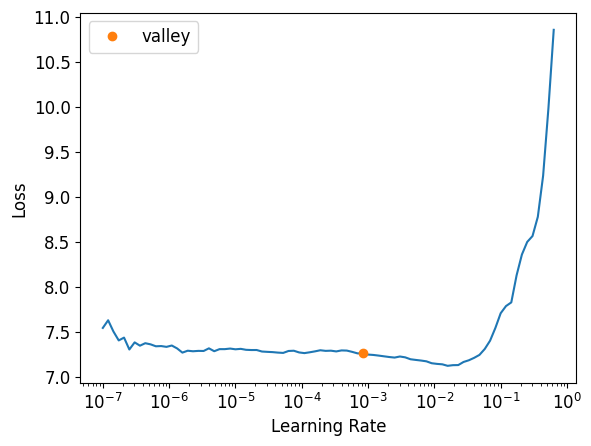

In [ ]:
# Realizar una búsqueda de tasa de aprendizaje
lr = learn2.lr_find()

print(lr)

Elijo 6 épocas en vez de 3 como en los casos anteriores porque entiendo que el modelo necesitará más épocas para poder ajustar los pesos, ya que ahora estos estan reiniciados.

In [ ]:
learn2.fine_tune(6, freeze_epochs=3, base_lr=lr[0])

epoch,train_loss,valid_loss,accuracy,time
0,6.881723,5.647910,0.008347,01:38
1,6.371056,5.357640,0.006678,01:35
2,5.986850,5.336360,0.011686,01:36


epoch,train_loss,valid_loss,accuracy,time
0,5.656599,5.086481,0.031720,01:41
1,5.605285,5.046660,0.026711,01:33
2,5.415742,4.944392,0.025042,01:33
3,5.158212,4.804526,0.046745,01:36
4,4.997960,4.767456,0.036728,01:41
5,4.894765,4.756658,0.043406,01:38


Podemos observar que ahora como hemos reiniciado los valores de los pesos al entrenar solo la cabeza de la red obtenemos resultados muy malos, pues los pesos del resto del modelo no ayudan nada en las predicciones.

En cuanto a las épocas globales vemos que los resultados son pésimos, los errores tanto en train como en validación van reduciéndose poco a poco, pero muy despacio, en cuanto a la accuracy esta está totalmente estancada.

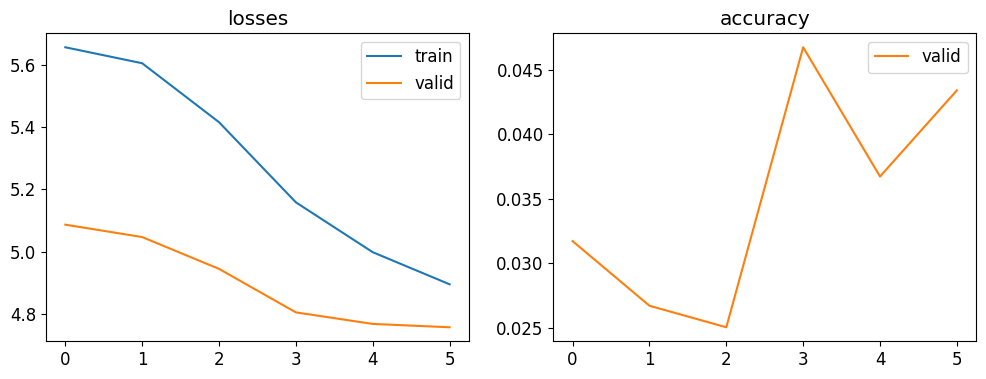

In [ ]:
learn2.recorder.plot_metrics() # muestra la gráfica de la accuracy

En las gráficas se puede ver mucho mejor todo, tanto el lento decaimiento del error, como el estancamiento de la accuracy.

In [ ]:
preds, targs, _ = learn2.get_preds(dl=dls.train, with_decoded=True)

# Calculamos la accuracy en train
acc = accuracy(preds, targs)
print('Accuracy en train : ', round(float(acc)*100, 4), '%')

Accuracy en train :  15.0695 %


In [ ]:
preds, targs, _ = learn2.get_preds(dl=dls.valid, with_decoded=True)

# Calculamos la accuracy en validación
acc = accuracy(preds, targs)
print('Accuracy en validación : ', round(float(acc)*100, 4), '%')

Accuracy en validación :  4.3406 %


Observando la accuracy en train vemos claramente que no es que sea un problema de sobreajuste, simplemente el modelo es pésimo.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn=learn2, dl=dls.valid)
interp.print_classification_report()

                                    precision    recall  f1-score   support

        001.Black_footed_Albatross       0.00      0.00      0.00         2
              002.Laysan_Albatross       0.00      0.00      0.00         2
               003.Sooty_Albatross       0.00      0.00      0.00         3
             004.Groove_billed_Ani       0.00      0.00      0.00         2
                005.Crested_Auklet       0.00      0.00      0.00         3
                  006.Least_Auklet       0.00      0.00      0.00         3
               007.Parakeet_Auklet       0.00      0.00      0.00         3
             008.Rhinoceros_Auklet       0.50      0.50      0.50         4
              009.Brewer_Blackbird       0.00      0.00      0.00         5
          010.Red_winged_Blackbird       0.00      0.00      0.00         4
               011.Rusty_Blackbird       0.00      0.00      0.00         3
       012.Yellow_headed_Blackbird       0.00      0.00      0.00         4
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Por último imprimo también la precision, recall y f1-score como en el 3.2, aunque los resultados como eran de esperar son pésimos.

La conclusión que saco de por qué el modelo con los pesos reiniciados es tan malo es la siguiente, los modelos preentrenados a menudo contienen características útiles aprendidas durante el entrenamiento en grandes conjuntos de datos. Al reiniciar estos pesos, se pierde la oportunidad de transferir este conocimiento relevante a nuestro problema especifico. Esto tiene sentido también por el reducido dataset con el que contamos, de 5,994 imágenes, con el que un modelo tan conplejo no es capaz de trabajar bien y será incapaz de generalizar bien para imágenes de fuera de la muestra.


## Selección del mejor modelo y resultados en test

Es obvio que el mejor modelo es el del apartado 3.2, con los pesos ya existentes de Resnet18 y usando la cabeza predeterminada de fastai, por lo que vamos a ver que tal funciona en test este modelo.

In [ ]:
test_files = [fn for fn in sorted((path/'test').glob('**/*')) if fn.is_file()]

test_dl = learn1.dls.test_dl(test_files,with_labels=True)

In [ ]:
preds, targs, _ = learn1.get_preds(dl=test_dl, with_decoded=True)

In [ ]:
acc = accuracy(preds, targs)
print('La accuracy para test es : ', round(float(acc)*100, 4), '%')

La accuracy para test es :  71.6258 %


Y vemos que el modelo obtiene un resultado similar al de validación, que recordemos era de un 75%, si que tal vez el hecho no tener representación de todas las clases en validación hiciera que sus resultados no fueran tan fiables, pero al final eran bastante representativos.

De nuevo vemos que no generaliza del todo bien, pues en train la accuracy es de un 89%, pero al final un 71% de accuracy es un muy buen resultado.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn=learn1, dl=test_dl)
interp.print_classification_report()

                                    precision    recall  f1-score   support

        001.Black_footed_Albatross       0.83      0.67      0.74        30
              002.Laysan_Albatross       0.73      0.73      0.73        30
               003.Sooty_Albatross       0.52      0.82      0.64        28
             004.Groove_billed_Ani       0.76      0.93      0.84        30
                005.Crested_Auklet       0.82      0.64      0.72        14
                  006.Least_Auklet       0.89      0.73      0.80        11
               007.Parakeet_Auklet       0.78      0.91      0.84        23
             008.Rhinoceros_Auklet       0.67      0.67      0.67        18
              009.Brewer_Blackbird       0.44      0.24      0.31        29
          010.Red_winged_Blackbird       0.93      0.87      0.90        30
               011.Rusty_Blackbird       0.42      0.33      0.37        30
       012.Yellow_headed_Blackbird       0.95      0.81      0.88        26
           

Y para el resto de métricas lo mismo, todas muy similares a las de validación también, y podemos observar que ya para test si tenemos la misma representación de cada clase, por lo que estos resultados si son más fiables.